In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [50]:
# load the data file
data = pd.read_csv(r"C:\Users\Soumik Ghosh\Desktop\great lakes\machine learning\unsupervised\Country-data-casestudy.csv")

In [51]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [52]:
# Let's explore this data


data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [53]:
data.shape

(167, 10)

<Axes: >

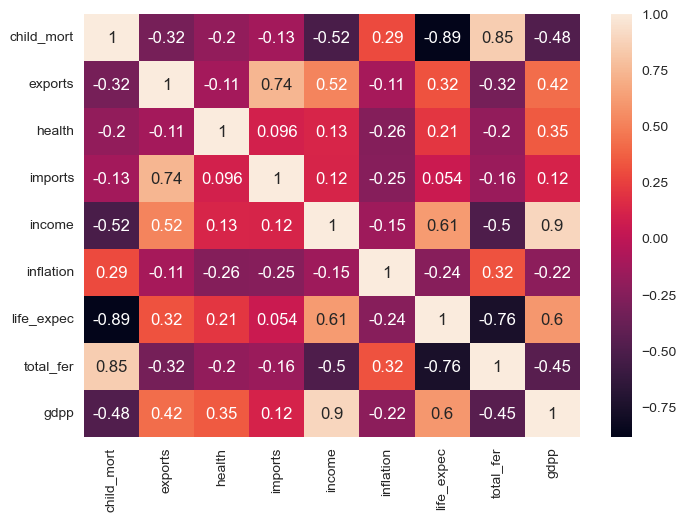

In [54]:
sns.heatmap(data.corr(numeric_only=True),annot =True )

In [55]:
## visualise this data
data.set_index('country',inplace=True)

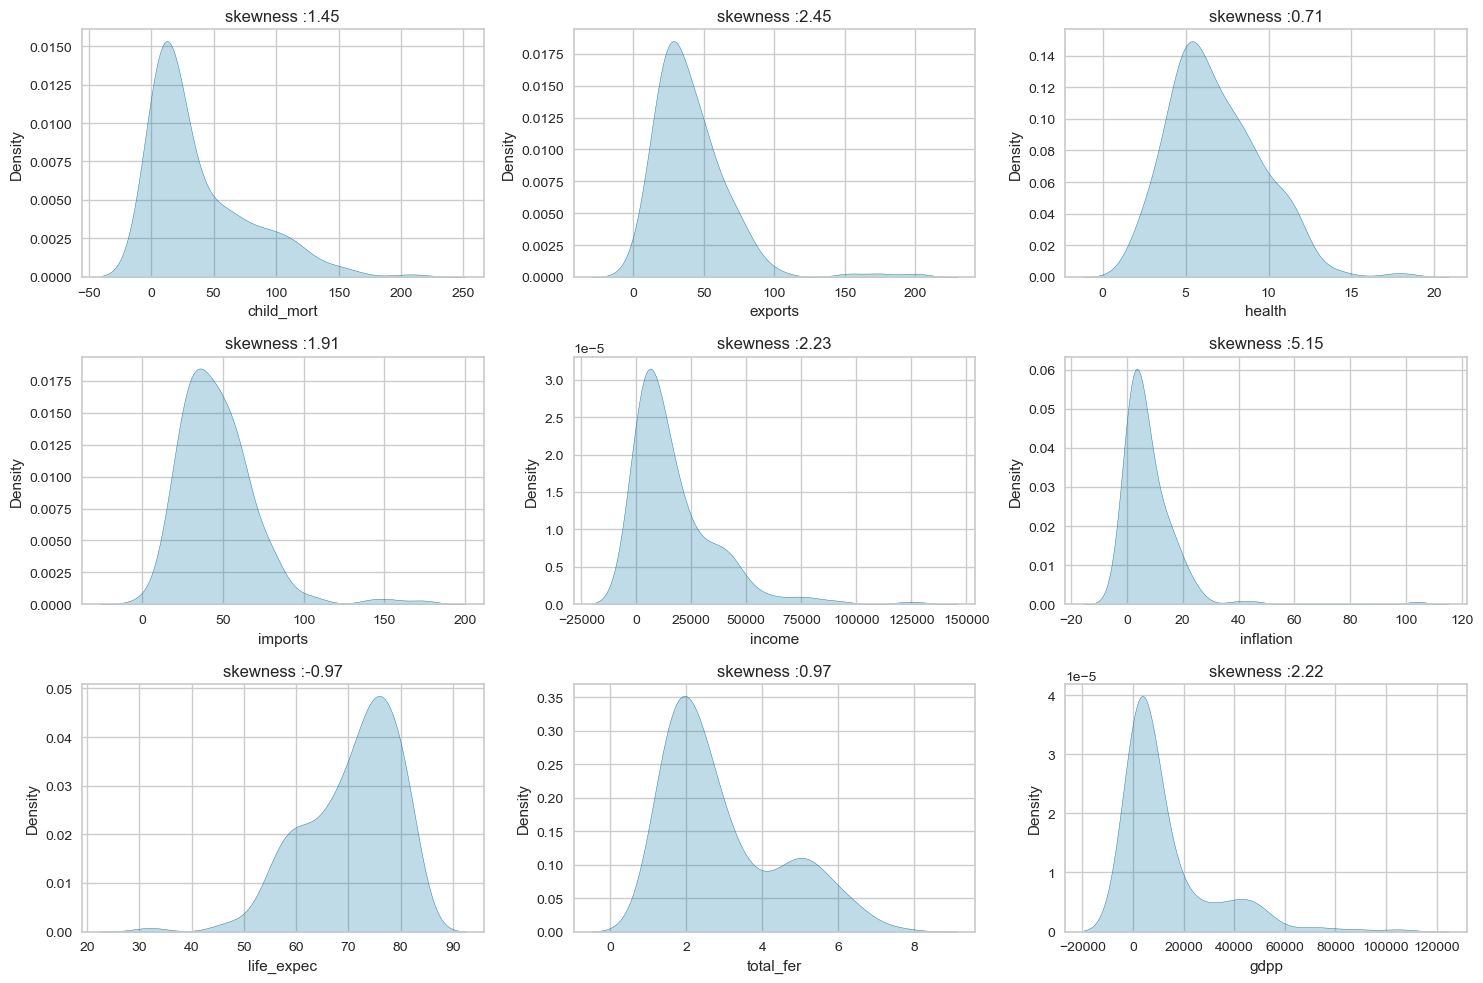

In [56]:
t = 1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.kdeplot(data = data, x = i,fill=True)
    plt.title(f'skewness :{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

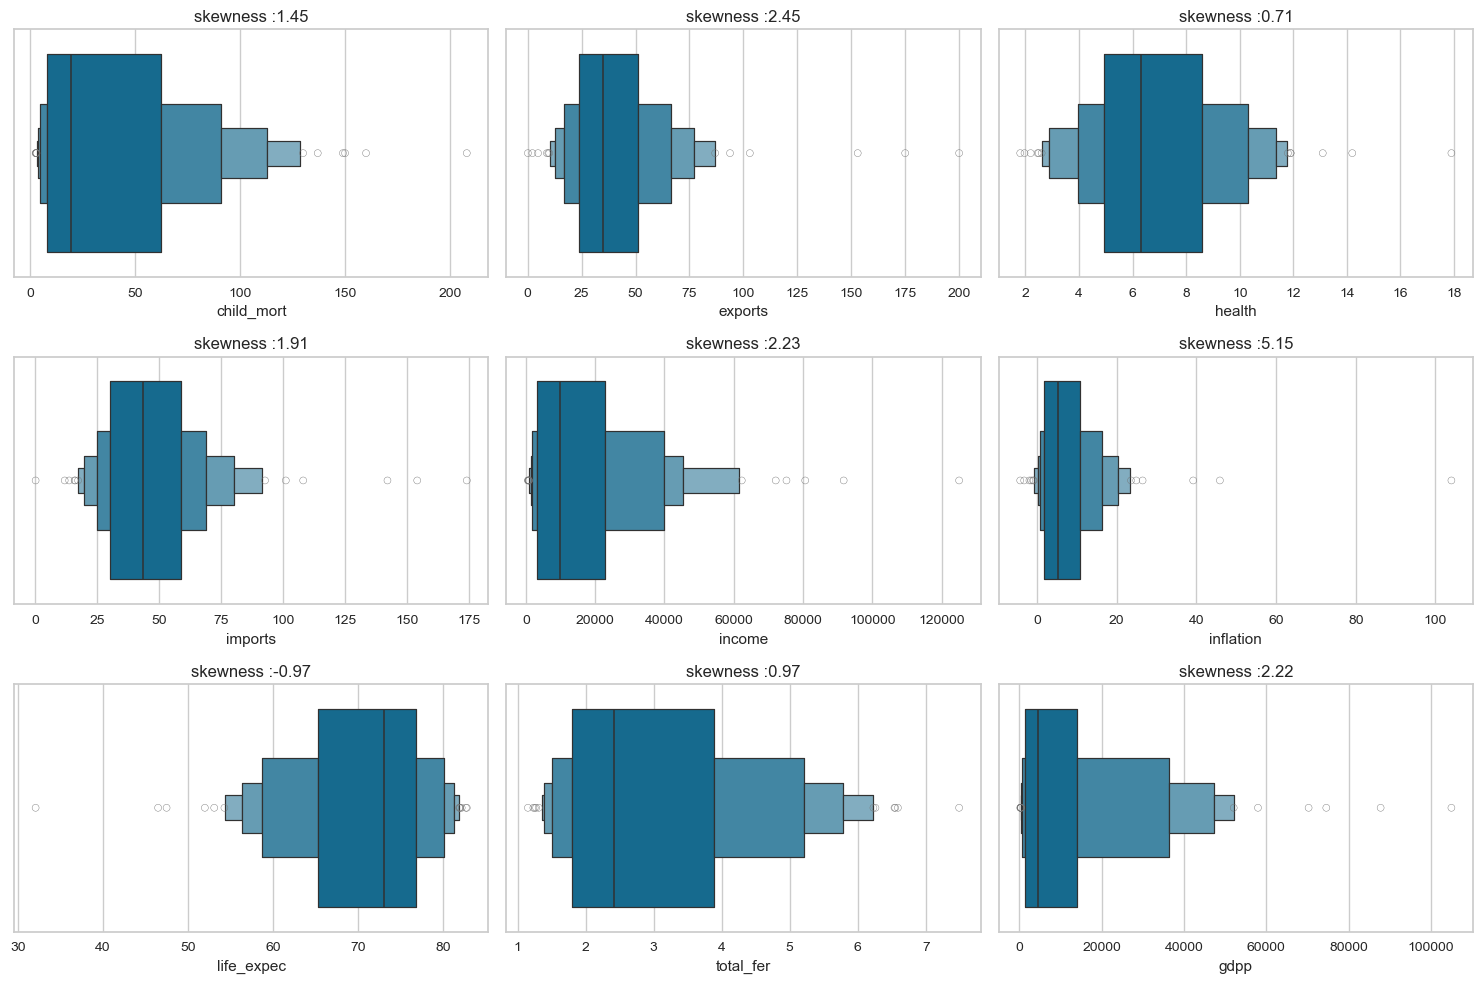

In [57]:
t = 1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxenplot(data = data, x = i,fill=True)
    plt.title(f'skewness :{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

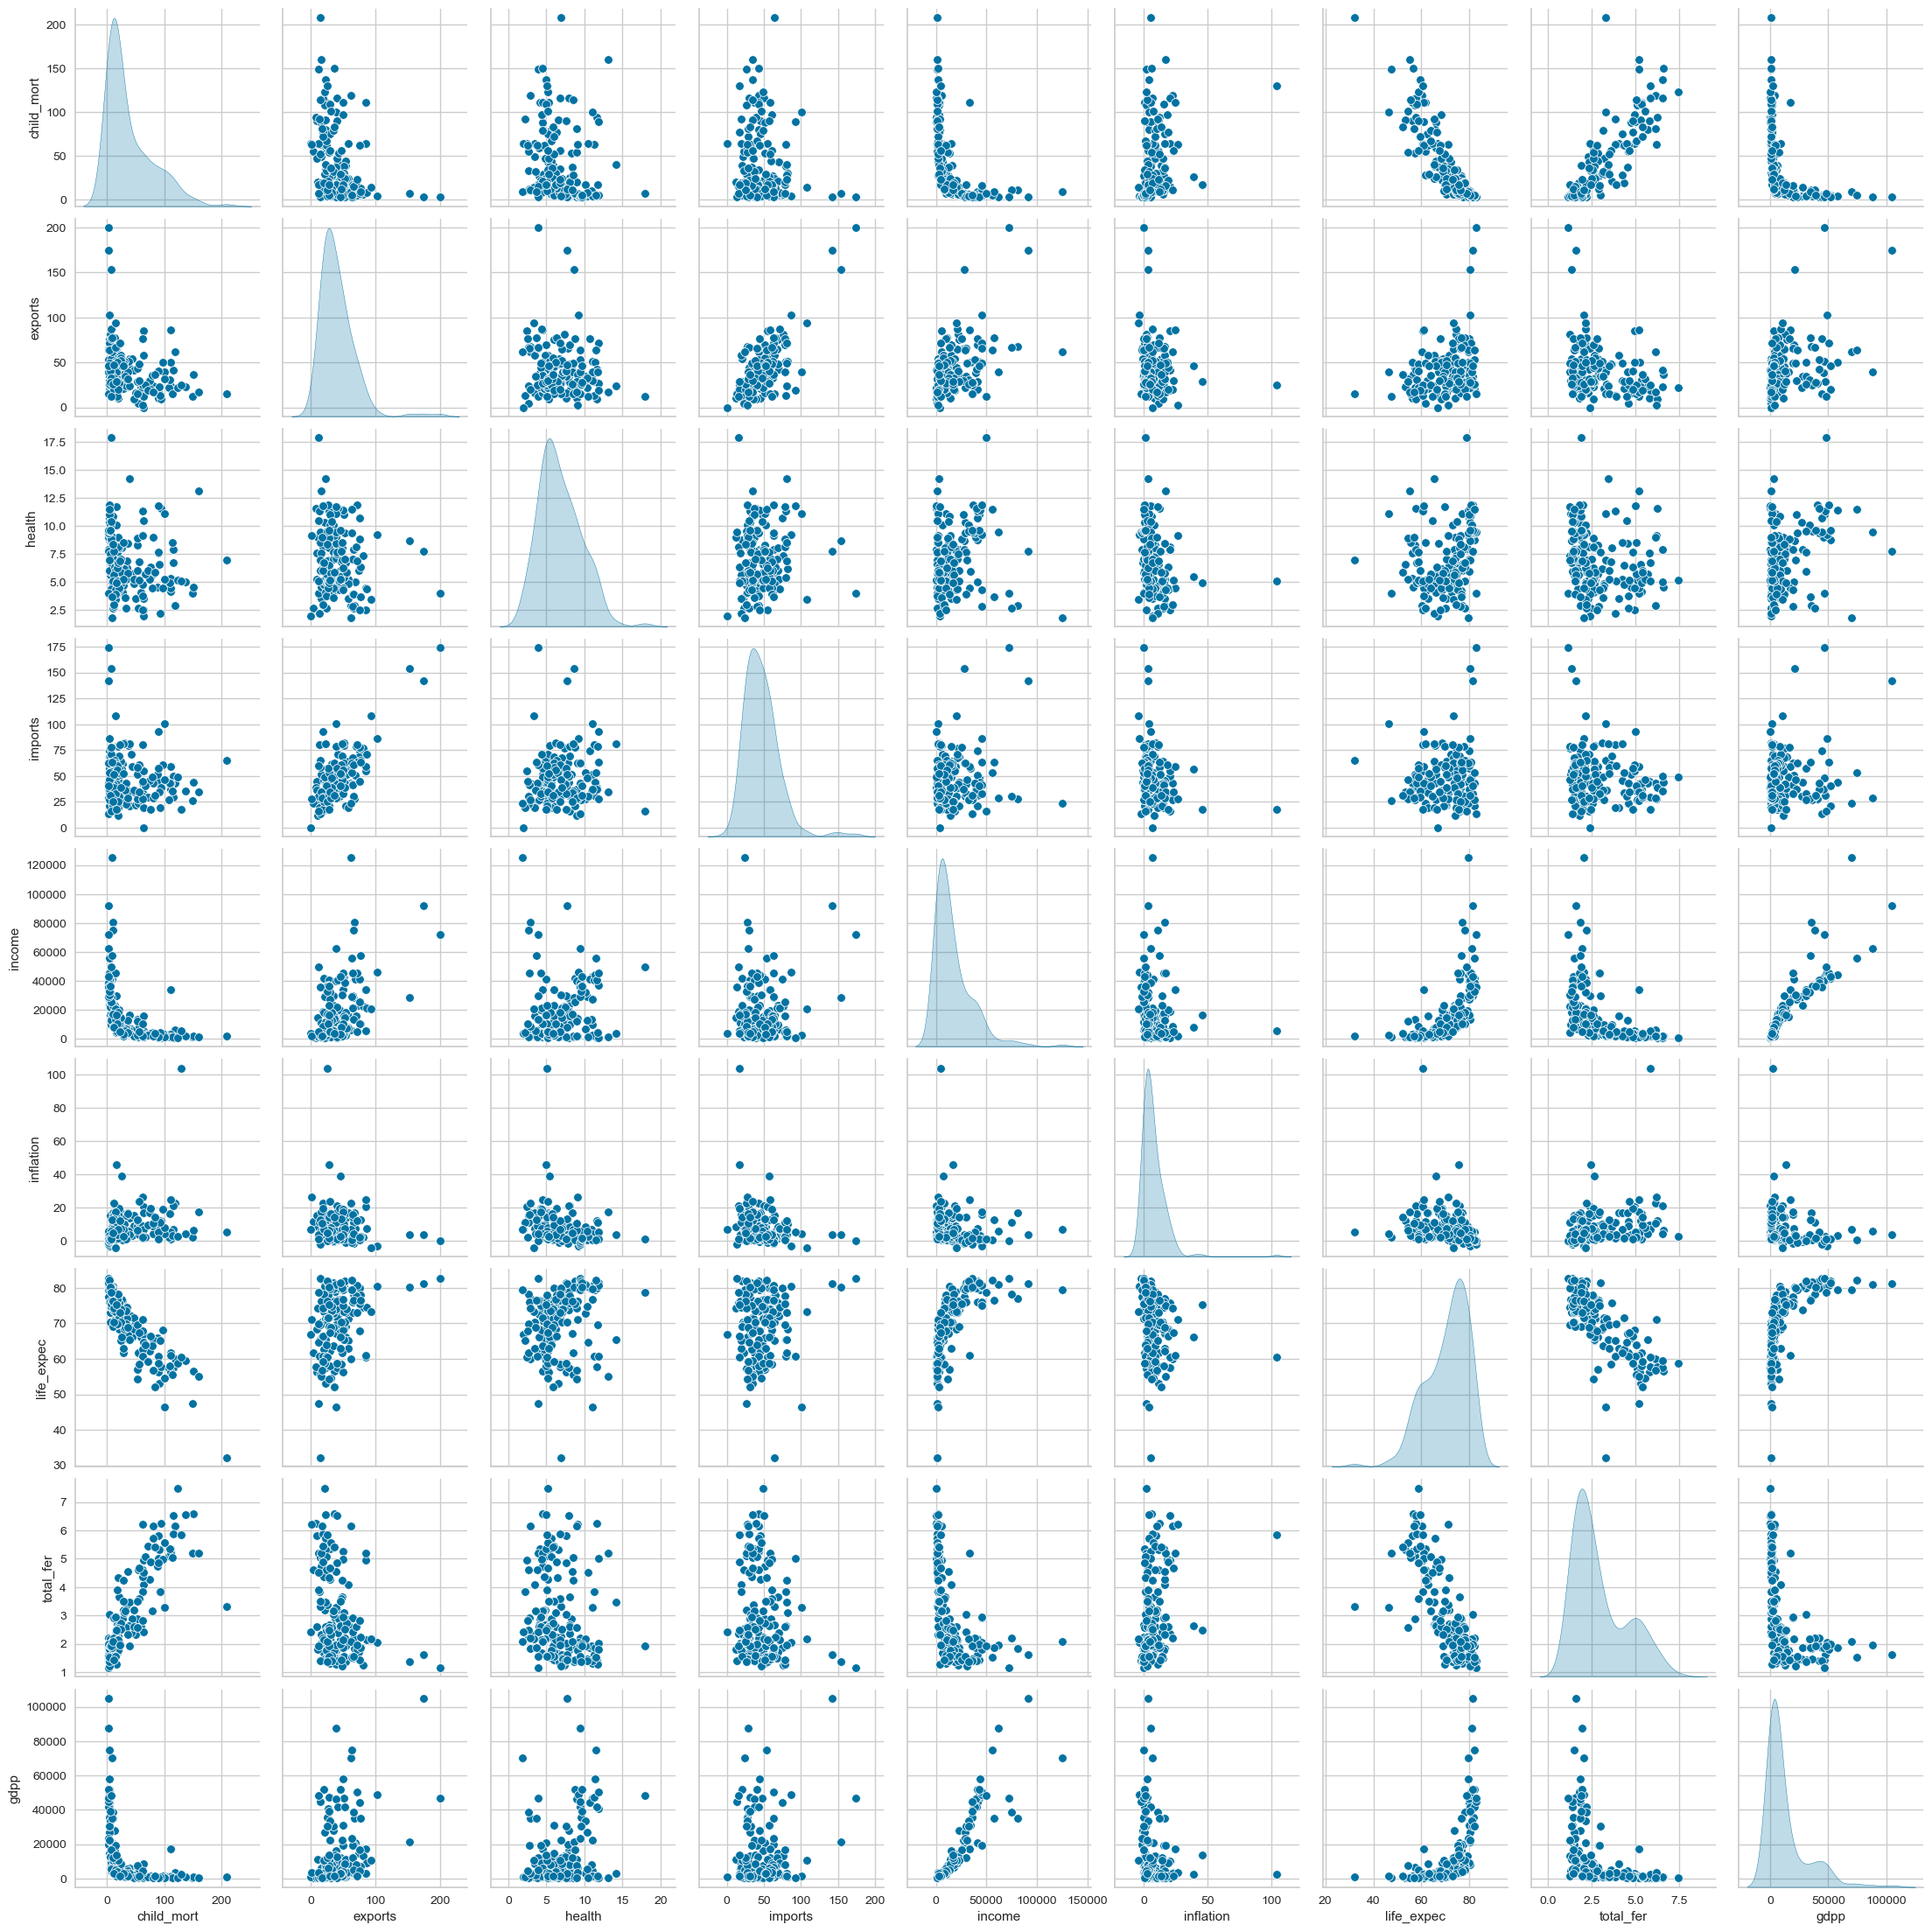

In [58]:
# Multivariate Analysis
sns.pairplot(data,diag_kind='kde')
plt.show()

In [59]:
# Feature Preprocessing
# Check for missing values - no missing values found
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [60]:
# treat the extreme outliers
for i in data.columns:
    q1,q3 = np.quantile(data[i],[0.25,0.75])
    iqr = q3 - q1
    ll,ul = q1 - 2.5*iqr,q1 + 2.5*iqr
    data[i] = data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

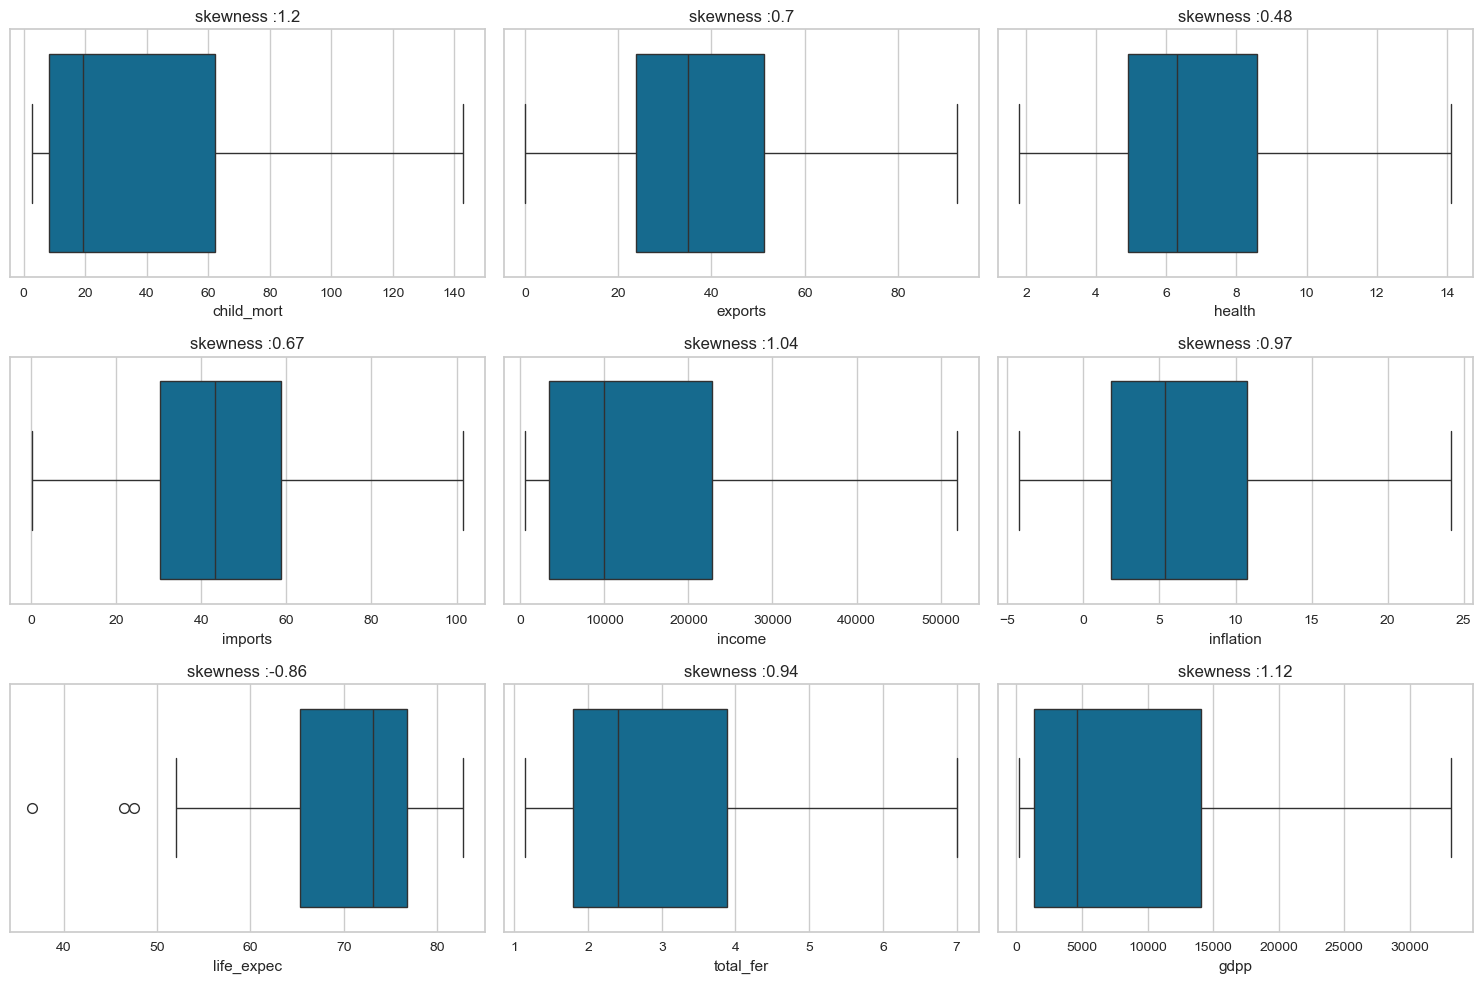

In [61]:
t = 1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data = data, x = i,fill=True)
    plt.title(f'skewness :{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [62]:
# Let's apply pca on the data before clustering - need standardised data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
# pca = PCA(n_components= 9,random_state=2)
pca = PCA(n_components= 5,random_state=2)
pipeline = Pipeline([('scaler',scaler),('pca',pca)])


In [63]:
pipeline.fit(data)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=5, random_state=2))])

In [64]:
pca.explained_variance_ratio_.cumsum()

array([0.48660229, 0.65126106, 0.78910711, 0.88423472, 0.94929387])

In [65]:
# We can go with 5 components and hence we are going to change it, as 5 components explain around 90% variance
final_data = pipeline.transform(data)

In [66]:

# .transform returns array, convert it to dataframe
final_data = pd.DataFrame(final_data,columns= ['pc1','pc2','pc3','pc4','pc5'],index=data.index)

In [67]:
final_data

,pc1,pc2,pc3,pc4,pc5
country,,,,,
Afghanistan,-3.151774,-0.247666,-1.010866,0.763786,-0.005965
Albania,0.427263,-0.217333,-0.285085,-1.391420,0.152969
Algeria,-0.423587,-0.630172,1.641033,-0.604777,0.534348
Angola,-3.284374,1.042609,2.162642,1.701902,0.170107
Antigua and Barbuda,1.246906,0.548269,-0.127936,-0.717814,-0.394834
...,...,...,...,...,...
Vanuatu,-0.863937,0.942698,-0.214577,-0.688161,-0.551250
Venezuela,-0.243748,-1.762567,2.224286,-0.064247,1.311425
Vietnam,0.305925,2.144941,0.485067,-0.752024,1.384143


## K _Means Clustering

In [ ]:
from sklearn.cluster import KMeans  
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [79]:
# identifying the value of k using elbow method
kelbow = KElbowVisualizer(estimator = KMeans(random_state=2), k=10)

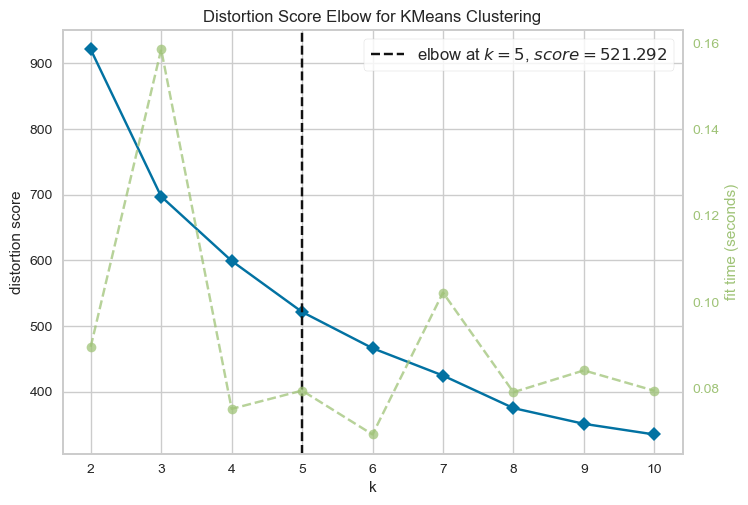

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
kelbow.fit(final_data)
kelbow.show()

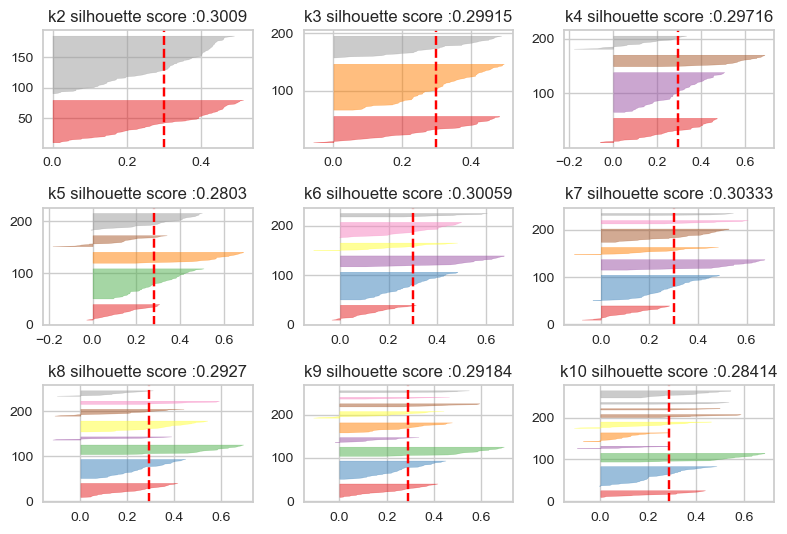

In [87]:
# Although the above plot shows 3 as the elbow point, we will go with 3 clusters as we see a significant drop in distortion score after 3 clusters.
# Let's, explore silhouette visualiser to identify more generalised value of k.
t = 1
for i in range(2,11):
    plt.subplot(3,3,t)
    model = KMeans(n_clusters=i,random_state=2)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(final_data)
    plt.title(f'k{i} silhouette score :{round(sil_viz.silhouette_score_,5)}')
    t+=1
plt.tight_layout()
plt.show()


In [ ]:
# After analysing silhouette_visualizer and elbow method, we can go with k=3 as the optimal number of clusters.

In [83]:
final_kmeans = KMeans(n_clusters=3,random_state=2)

In [84]:
labels = final_kmeans.fit_predict(final_data)

In [86]:
# Lets check the silhouette score as well.
print('Silhouette Score:',silhouette_score(final_data,labels))

Silhouette Score: 0.2991474320302733


In [89]:
# Lets put these on pca data
final_data['Labels'] = labels
final_data.head()

,pc1,pc2,pc3,pc4,pc5,Labels
country,,,,,,
Afghanistan,-3.151774,-0.247666,-1.010866,0.763786,-0.005965,0
Albania,0.427263,-0.217333,-0.285085,-1.391420,0.152969,1
Algeria,-0.423587,-0.630172,1.641033,-0.604777,0.534348,1
Angola,-3.284374,1.042609,2.162642,1.701902,0.170107,0
Antigua and Barbuda,1.246906,0.548269,-0.127936,-0.717814,-0.394834,1


In [90]:
# Lets visualise the clusters
# In order to get the best visualisation, lets choose pc1 and pc2 as they have maximum variance.
centroids = final_kmeans.cluster_centers_
centroids

array([[-2.59521175,  0.05945951, -0.19644101,  0.62345073, -0.16601327],
       [ 0.16256612,  0.14063416,  0.1249198 , -0.75433325,  0.21185395],
       [ 2.78992555, -0.36374267, -0.02271221,  0.81535407, -0.23993709]])

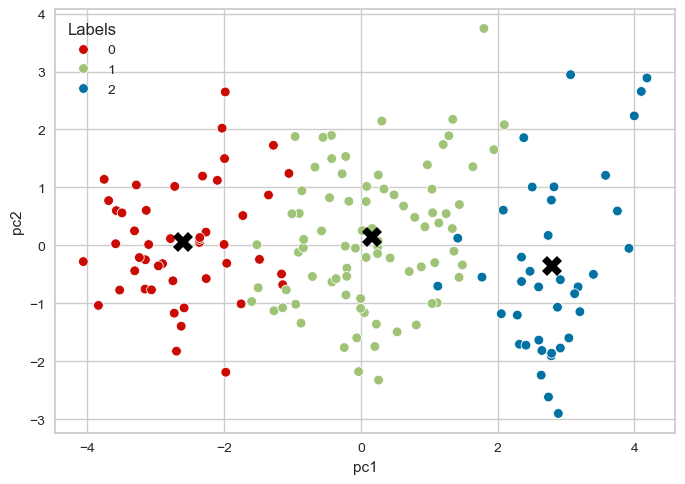

In [92]:
sns.scatterplot(data=final_data,x='pc1',y='pc2',palette=['r','g','b'],hue='Labels')
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='X',color = 'black',markersize=15)
plt.show()

## Business Interpretation

In [93]:
# put labels in original data
data['Labels'] = labels
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


In [96]:
data.groupby(by = 'Labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Labels,,,,,,,,,
0,91.182979,28.225936,6.253830,41.233317,3738.574468,10.215426,59.488298,4.987819,1808.297872
1,22.083951,40.401914,6.323210,48.329321,11477.160494,7.051469,72.613580,2.303457,5970.666667
2,5.671795,51.400000,8.416667,46.316026,39834.358974,3.296718,79.733333,1.815897,29744.871795


In [98]:
# 0 is underdeveloped, 1 is developing and 2 is developed countries based on the features provided.
data['Labels']=data['Labels'].map({0:'Underdeveloped',1:'Developing',2:'Developed'})


In [99]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,Developing
Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0,Developing
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,Developing


In [100]:
data[data['Labels']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea', 'Eritrea', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'],
      dtype='object', name='country')

In [101]:
data[data['Labels']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
       'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Solomon Islands',
       'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan',
       'Thailand', '

In [102]:
data[data['Labels']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'],
      dtype='object', name='country')

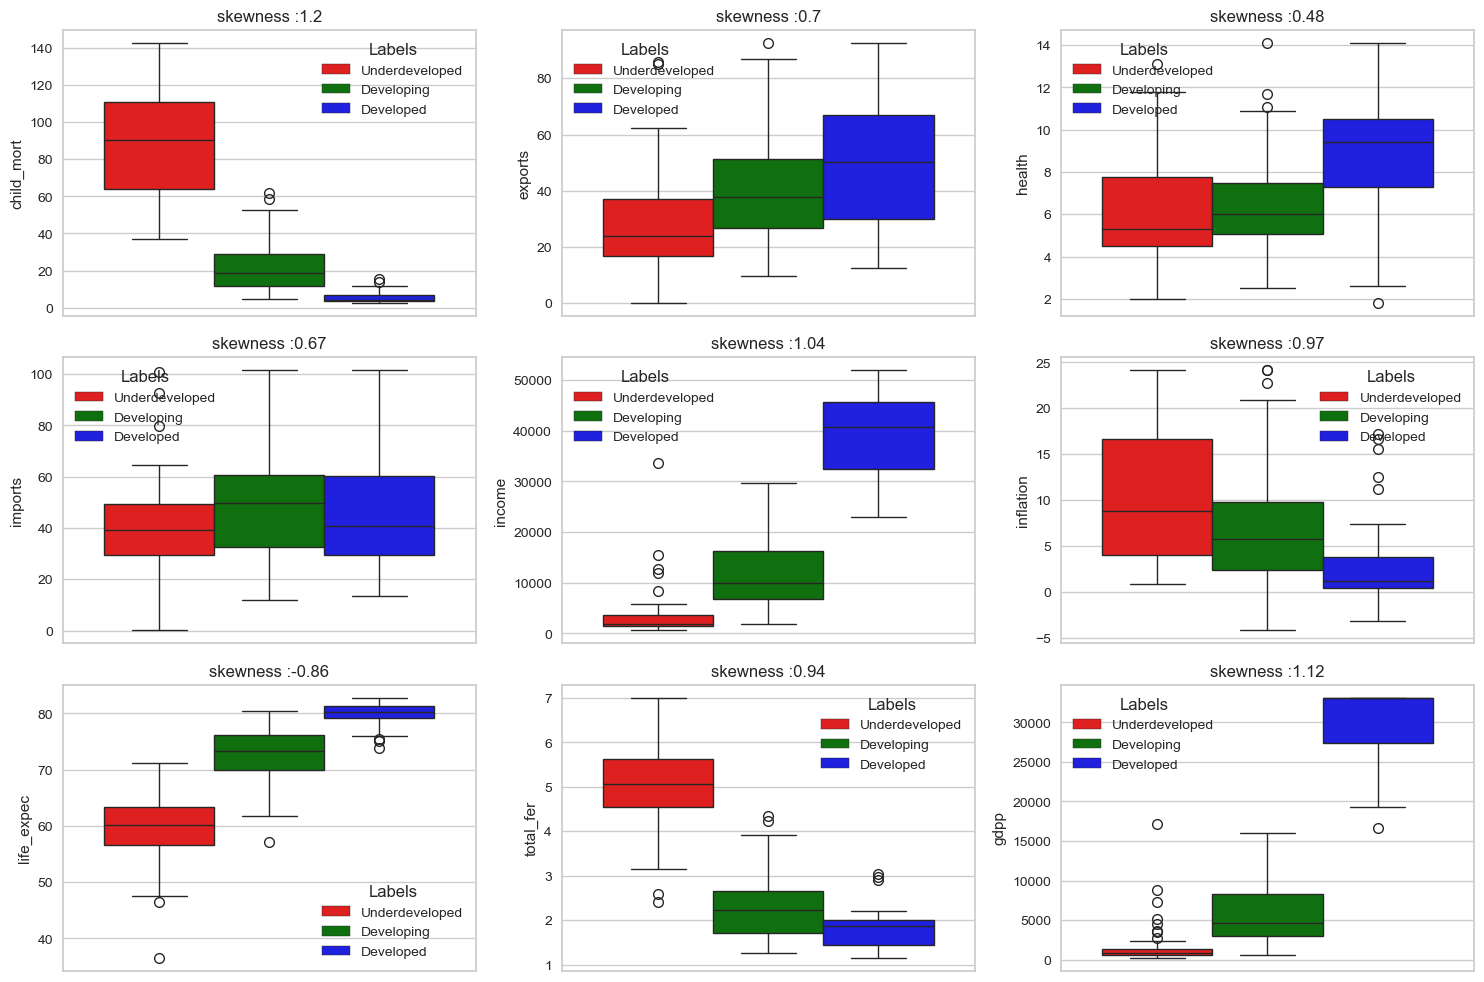

In [107]:
t = 1
plt.figure(figsize=(15,10))
for i in data.columns:
    if i != 'Labels':
        plt.subplot(3,3,t)
        sns.boxplot(data = data, y = i,palette=['red', 'green', 'blue'],hue = 'Labels', fill=True)
        plt.title(f'skewness :{round(data[i].skew(),2)}')
        t+=1
plt.tight_layout()
plt.show()

In [109]:
px.choropleth(data_frame=data,locations=data.index,locationmode='country names',color='Labels',title='Country Development Status',color_discrete_map={'Underdeveloped':'red','Developing':'green','Developed':'blue'})